In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('frauddetection.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [36]:
df['type'].value_counts()

type
PAYMENT     5604
CASH_IN     1954
CASH_OUT    1340
TRANSFER     956
DEBIT        346
Name: count, dtype: int64

In [37]:
df.shape

(10200, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10200 non-null  int64  
 1   type            10200 non-null  object 
 2   amount          10200 non-null  float64
 3   nameOrig        10200 non-null  object 
 4   oldbalanceOrg   10200 non-null  float64
 5   newbalanceOrig  10200 non-null  float64
 6   nameDest        10200 non-null  object 
 7   oldbalanceDest  10200 non-null  float64
 8   newbalanceDest  10200 non-null  float64
 9   isFraud         10200 non-null  int64  
 10  isFlaggedFraud  10200 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 876.7+ KB


In [39]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10200.000000,1.020000e+04,1.020000e+04,1.020000e+04,1.020000e+04,1.020000e+04,10200.000000,10200.0
mean,4.234216,1.047851e+05,8.775930e+05,8.983386e+05,9.301008e+05,1.107145e+06,0.006667,0.0
std,2.486348,2.702837e+05,2.117856e+06,2.163309e+06,2.675335e+06,3.050868e+06,0.081381,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397530e+03,1.287500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.273533e+04,2.130616e+04,1.009601e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.138022e+05,1.701815e+05,1.680705e+05,2.787375e+05,2.489311e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,2.376811e+07,1.000000,0.0


In [40]:
#Checking the Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [41]:
#Now checking the total number of fraud transaction.
#Here ,
#0 - non-fraudulent transaction.
#1 - fraudulent transaction.

df['isFraud'].value_counts().reset_index().rename(columns={'index': 'Value', 'isFraud': 'Count'})

,Count,count
0,0,10132
1,1,68


In [42]:
df['isFlaggedFraud'].value_counts().reset_index().rename(columns={'index': 'Value', 'isFraud': 'Count'})

,isFlaggedFraud,count
0,0,10200


In [43]:
#Removing the unnecessary columns

df = df.drop(columns = 'step')
df.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
df.replace(to_replace = ['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value = [2,4,1,5,3],inplace=True)

In [45]:
#Splittind the Data for training

X = df.drop(columns = ['isFraud','isFlaggedFraud','nameOrig','nameDest'],axis=1)
Y = df['isFraud']

In [46]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,2,9839.64,170136.0,160296.36,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,2,11668.14,41554.0,29885.86,0.0,0.0


In [47]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [48]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [49]:
X_train.shape

(8160, 6)

In [50]:
X_test.shape

(2040, 6)

In [51]:
Y_train.shape

(8160,)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier()

In [54]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [55]:
model.score(X_test,Y_test)

0.9941176470588236

In [56]:
#Now Checking Accuracy of Logistic Regression for this dataset

from sklearn.linear_model import LogisticRegression

In [57]:
classifier = LogisticRegression()

In [58]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9941176470588236


In [60]:
import numpy as np

# Assuming you have defined the trained classifier 'classifier'

input_data = [
   2,9839.64,170136.0,160296.36,0.0,0.0
]

# Convert non-numeric values to a consistent format (e.g., '0' or 0)
processed_data = []
for value in input_data:
    if isinstance(value, str) and not value.isnumeric():
        processed_data.append(0)
    else:
        processed_data.append(value)

# Convert the processed data to a numpy array
input_data_as_numpy_array = np.asarray(processed_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('Not a fraudulent transaction')
else:
    print('Fraudulent transaction')

[0]
Not a fraudulent transaction


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
import numpy as np

# Assuming you have defined the trained classifier 'classifier'

input_data = [
    4,181.00,181.0,0.00,0.0,0.0
]

# Convert non-numeric values to a consistent format (e.g., '0' or 0)
processed_data = []
for value in input_data:
    if isinstance(value, str) and not value.isnumeric():
        processed_data.append(0)
    else:
        processed_data.append(value)

# Convert the processed data to a numpy array
input_data_as_numpy_array = np.asarray(processed_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('Not a fraudulent transaction')
else: 
    print('Fraudulent transaction')

[1]
Fraudulent transaction


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
##to check count of columns with different datatypes like Category, Integer, Float. 

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 2
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

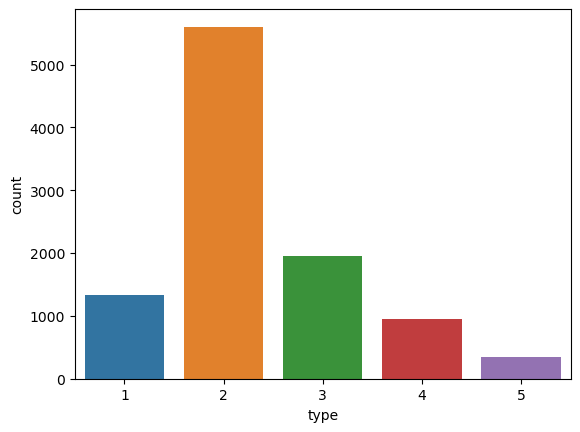

In [66]:
## graph visulization of type of payments
sns.countplot(x='type', data=df)

In [67]:
## count of  0 and 1 values
df['isFraud'].value_counts()

isFraud
0    10132
1       68
Name: count, dtype: int64

In [69]:
##Dropping irrelevant columns like nameOrig, nameDest and Data Splitting

type_new = pd.get_dummies(df['type'], drop_first=True)
df_new = pd.concat([df, type_new], axis=1)
df_new.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,2,3,4,5
0,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,False,False,False
1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,False,False,False
2,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,True,False
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,False,False,False
4,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,False,False,False


In [70]:
## Once we done with the encoding, now we can drop the irrelevant columns
X = df_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df_new['isFraud']

<Axes: >

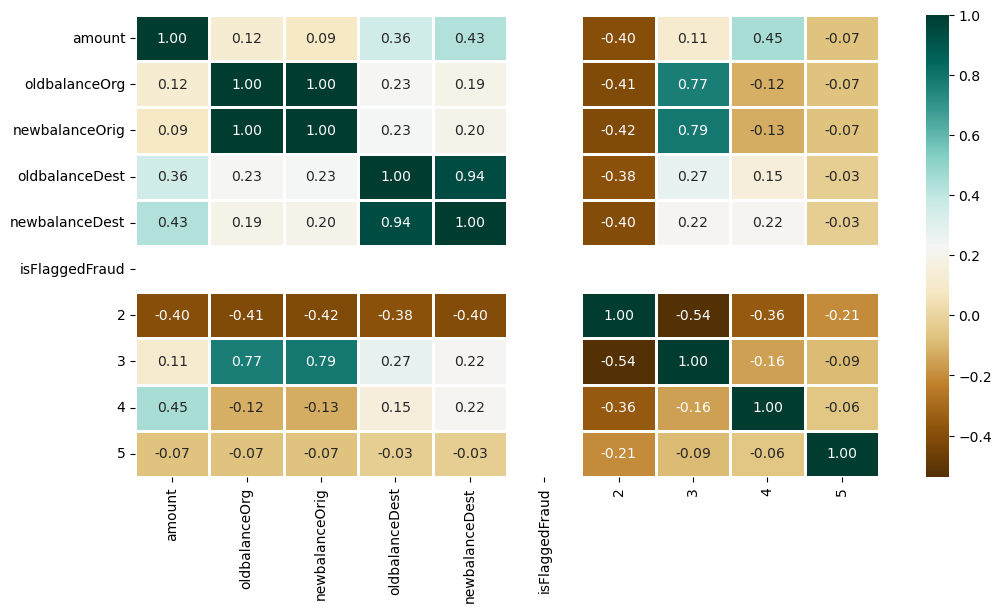

In [71]:
## Let’s find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [72]:
y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [73]:
## to see rows and columns 
X.shape, y.shape

((10200, 10), (10200,))